# L4: Preprocessing PDFs and Images

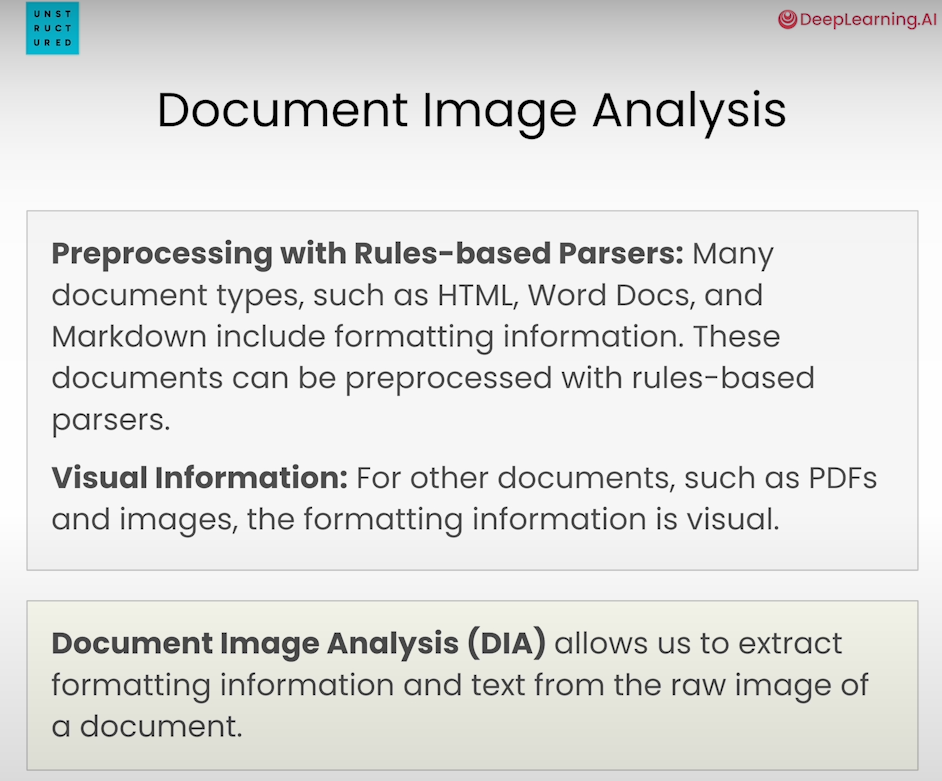

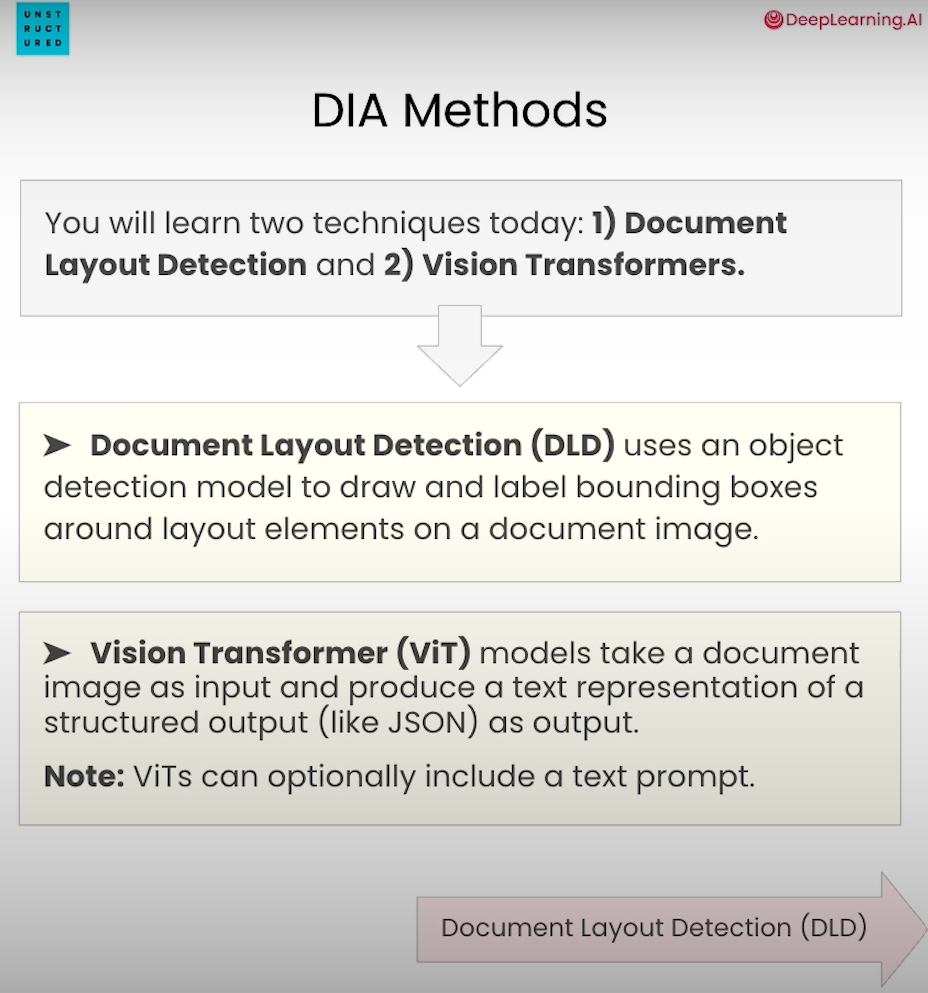

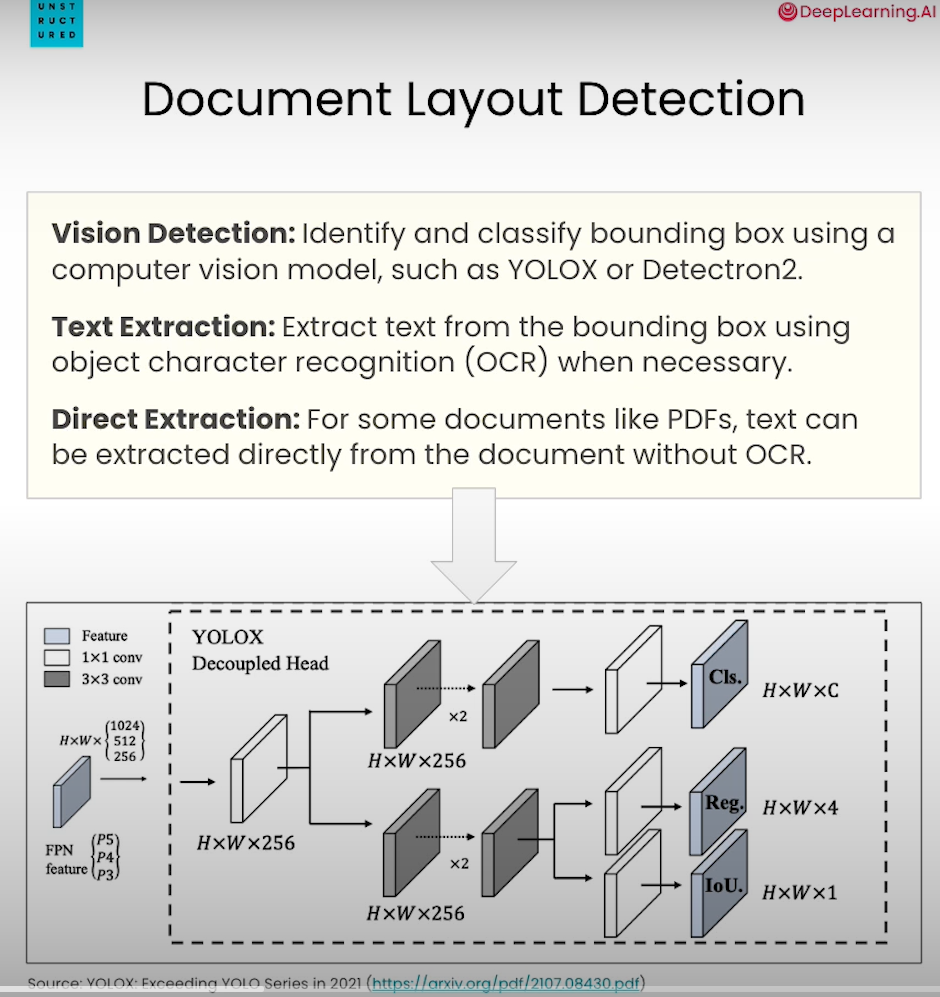

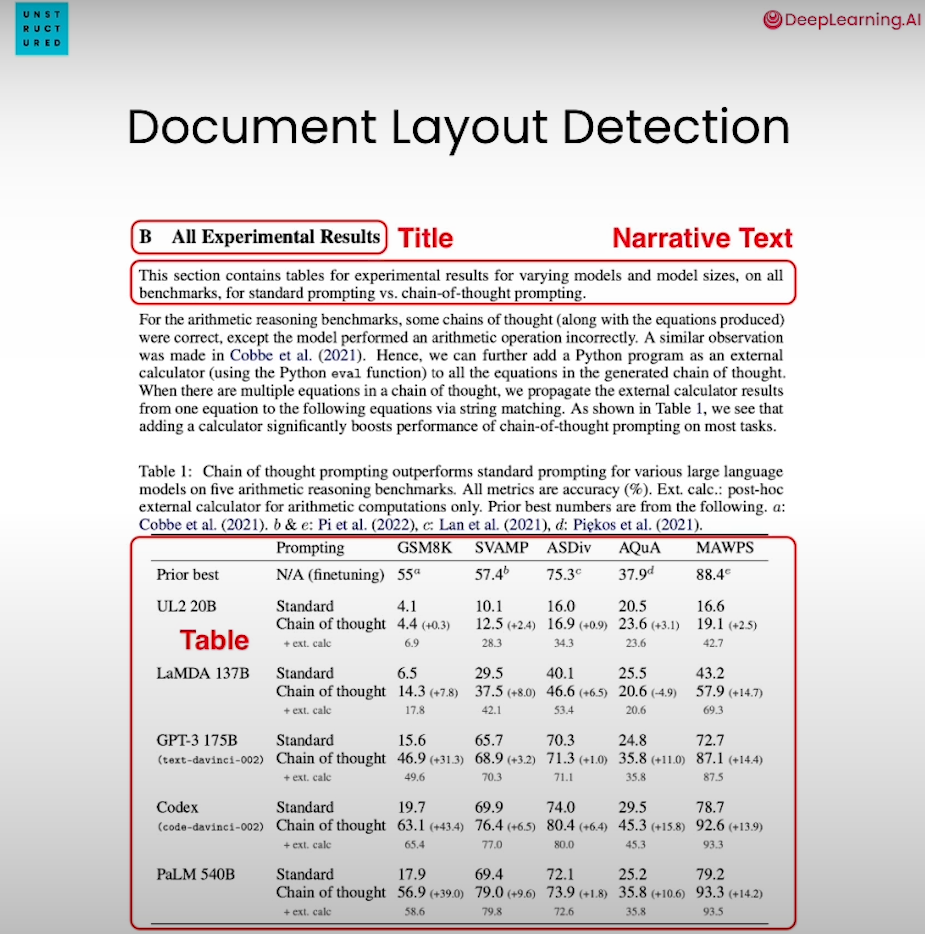

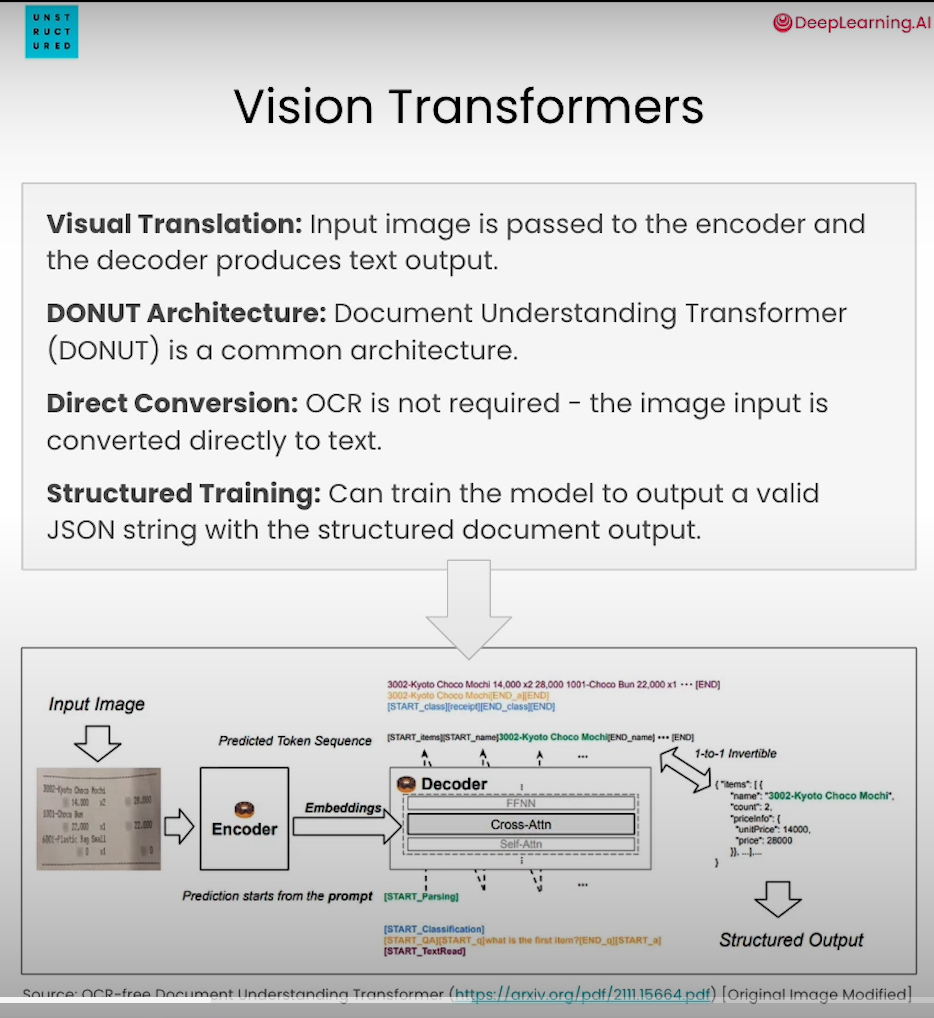

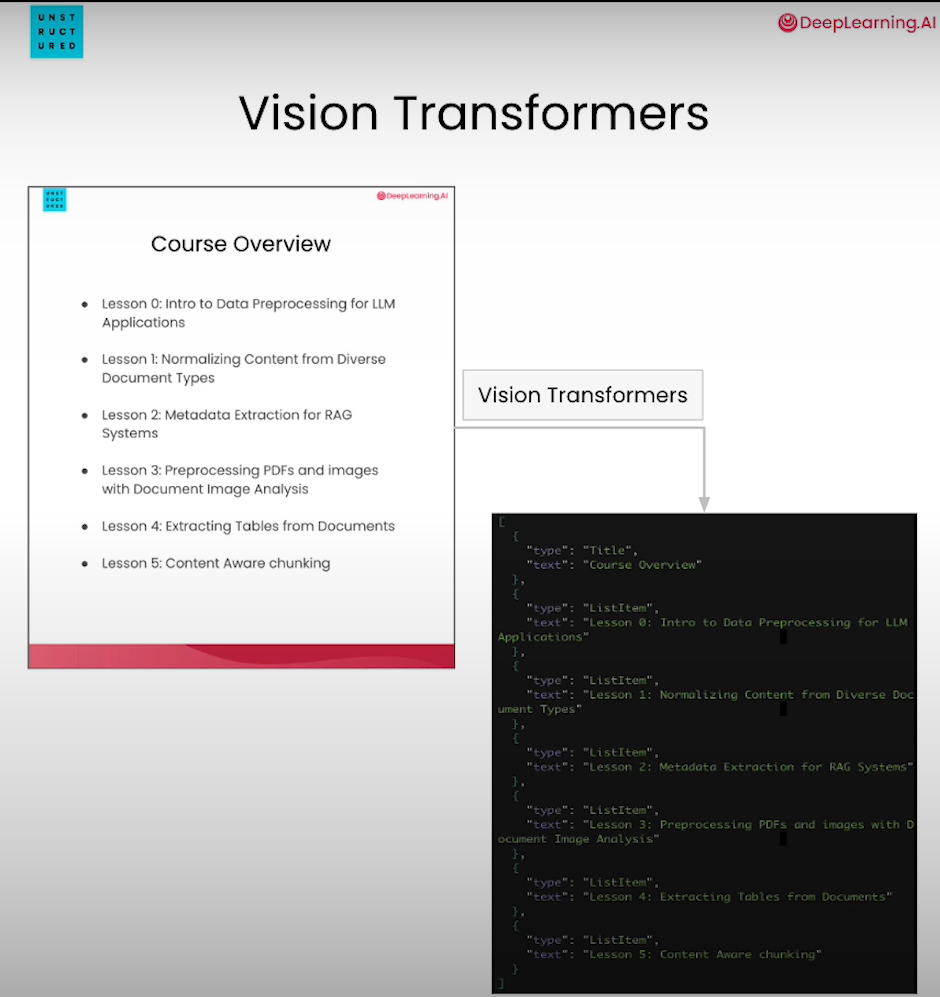

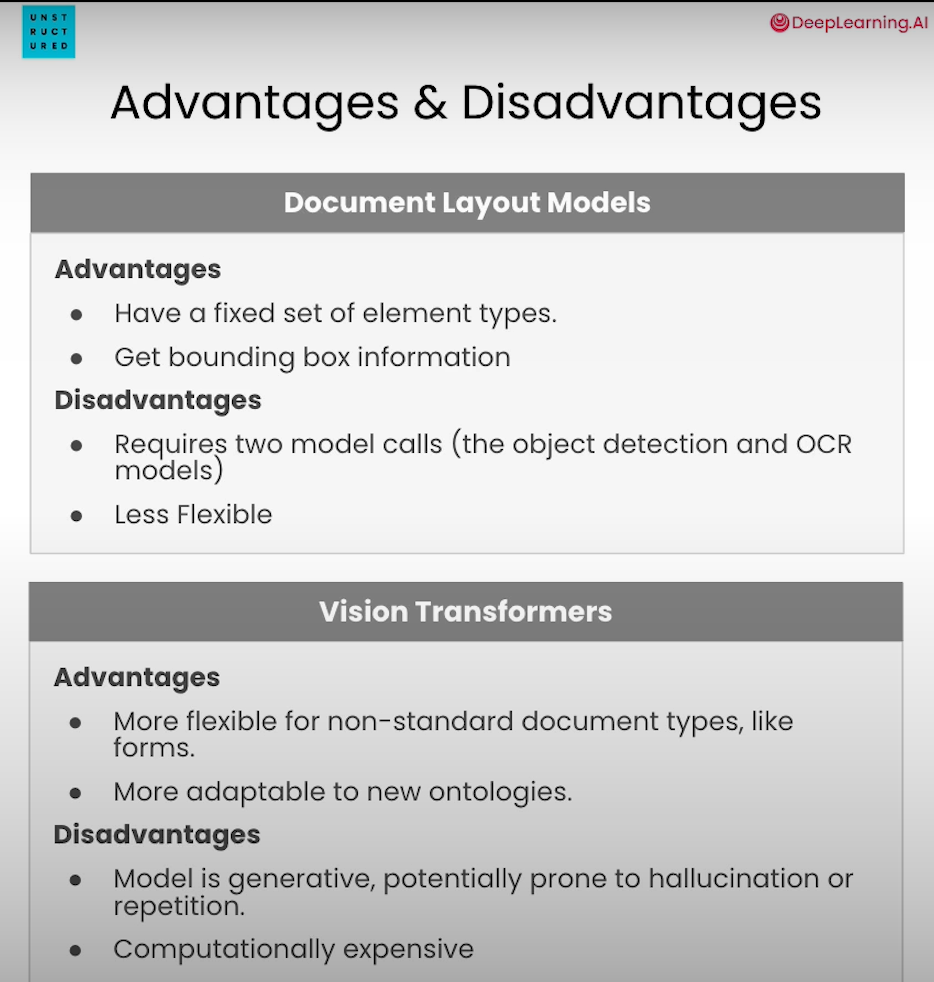

In [ ]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.partition.html import partition_html
from unstructured.partition.pdf import partition_pdf

from unstructured.staging.base import dict_to_elements

In [ ]:
from Utils import Utils
utils = Utils()

DLAI_API_KEY = utils.get_dlai_api_key()
DLAI_API_URL = utils.get_dlai_url()

s = UnstructuredClient(
    api_key_auth=DLAI_API_KEY,
    server_url=DLAI_API_URL,
)

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access helper functions and other related files for this notebook, 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>


## Example Document: News in PDF and HTML

### View the content of the files
- <a href="example_files/el_nino.pdf">El Nino (View PDF) -- Click Here</a>
- <a href="example_files/el_nino.html">El Nino (View HTML) -- Click Here</a>


In [ ]:
from IPython.display import Image
Image(filename="images/el_nino.png", height=600, width=600) 

## Process the Document as HTML

In [ ]:
filename = "example_files/el_nino.html"
html_elements = partition_html(filename=filename)

In [ ]:
for element in html_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

## Process the Document with Document Layout Detection

In [ ]:
filename = "example_files/el_nino.pdf"
pdf_elements = partition_pdf(filename=filename, strategy="fast")

In [ ]:
for element in pdf_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

In [ ]:
with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy="hi_res",
    hi_res_model_name="yolox",
)

try:
    resp = s.general.partition(req)
    dld_elements = dict_to_elements(resp.elements)
except SDKError as e:
    print(e)

In [ ]:
for element in dld_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

In [ ]:
import collections

In [ ]:
len(html_elements)

In [ ]:
html_categories = [el.category for el in html_elements]
collections.Counter(html_categories).most_common()

In [ ]:
len(dld_elements)

In [ ]:
dld_categories = [el.category for el in dld_elements]
collections.Counter(dld_categories).most_common()

## Work With Your Own Files

In [ ]:
import panel as pn
#import param
from Utils import upld_file
pn.extension()

upld_widget = upld_file()
pn.Row(upld_widget.widget_file_upload)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 🖥 &nbsp; <b>Note:</b> If the file upload interface isn't functioning properly, the issue may be related to your browser version. In such a case, please ensure your browser is updated to the latest version, or try using a different browser.</p>


In [ ]:
!ls ./example_files

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Uploading Your Own File - Method 2:</b> To upload your own files, you can also 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. Then 3) click on <em>"Upload"</em> button to upload your files. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>